# Student ID: 19012516

In [5]:
#Below copied from Week1_CurveFitting

import numpy as np  #import the numpy library as np
import matplotlib.pyplot as plt #import the pyplot library as plt
import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

In [6]:
def polyModelWithNoise(x,theta,sigma):
    '''Inputs: 
    x is a float or numpy array of floats
    theta a float or array of floats
    sigma is a float
    Function:
    Polynomial of order len(theta)-1 with theta values as coefficients
    + Noise function with standard deviation sigma
    Output:
    float or numpy array of floats with same length as x
    each value is the value of the function for each value of x'''
    F = sigma * np.random.randn(len(x)) # start with noise function, then add polynomial terms using for loop
    for i in range(len(theta)):
        F += theta[i] * x **i # evaluates polynomial terms starting at x^0, then x^1 etc.
    return F    

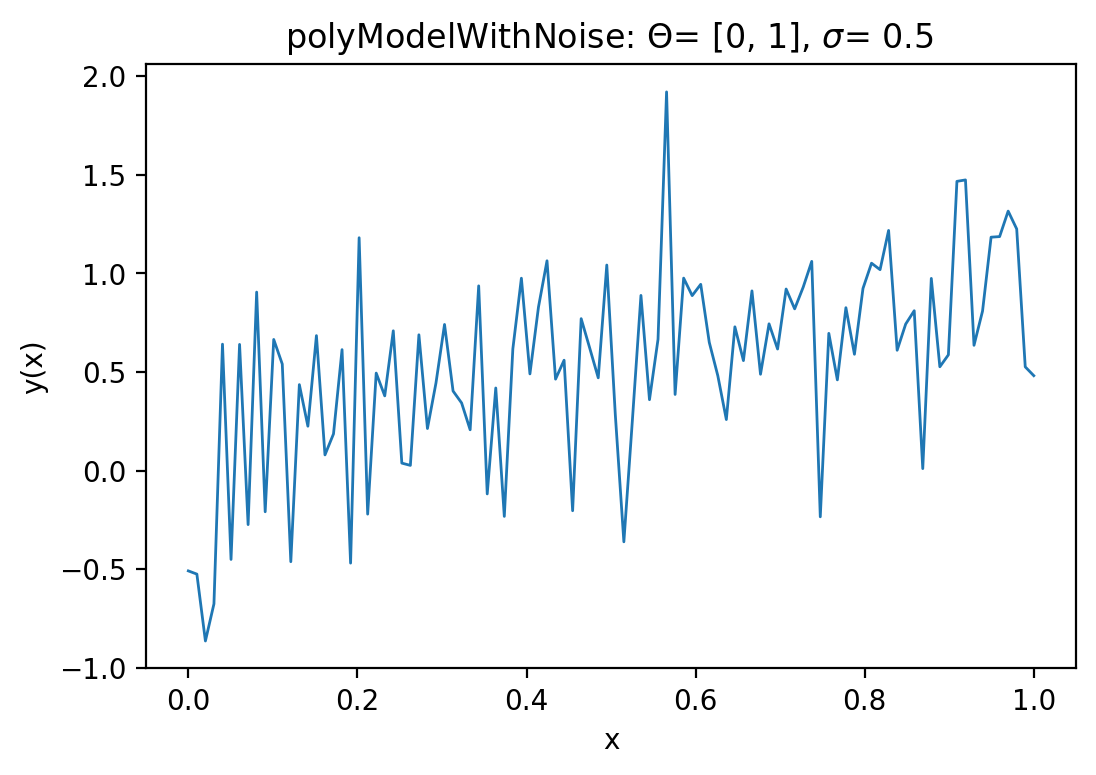

In [7]:
x = np.linspace(0,1,100)#variables as instructed
theta = [0,1]
sigma = 0.5
y = polyModelWithNoise(x,theta,sigma)
fig, ax = plt.subplots()
ax.plot(x,y,linewidth=1)
ax.set_xlabel("x")
ax.set_ylabel("y(x)")
ax.set_title(f"polyModelWithNoise: $\Theta$= {theta}, $\sigma$= {sigma} ");
#why does $\theta$ not work in above f string?

# Comments
As expected the plot is of y=x with noise on top.

# Task
Make the polyGradient function. Rather than just calculate so it works with the first example: $\theta$ = [0,1], it should work for all lengths of $\theta$ array making use of the fact that:

$$ \frac{\partial y}{\partial \theta_i} = x^i$$ unless $$\theta_i = 0$$ in which case $$ \frac{\partial y}{\partial \theta_i} = 0$$

In [8]:
def polyGradient(x,theta):
    ''' Inputs: 
    x is a float or numpy array of floats
    theta a float or array of floats
    Function:
    The gradient of the polynomial function 
    with respect to the parameters theta
    Output:
    float or numpy array of floats with shape len(theta), len(x)'''
    G = np.zeros((len(theta),len(x)))# make numpy array of the right shape
    for i in range(len(theta)):
        if theta[i] == 0:#in this case there is nothing to differentiate
            G[i] = 0*x#a row of zeros of length len(x)
        else:
            G[i] = x ** i
    return G        

In [9]:
print('Shape of polyGradient:', np.shape(polyGradient(x,theta)))
print('Shape of polyModelWithNoise:', np.shape(polyModelWithNoise(x,theta,sigma)))

Shape of polyGradient: (2, 100)
Shape of polyModelWithNoise: (100,)


# Comments
As expected and in-line with assignment: "NB: The dimensions of the arrays that these two functions will return are different. One should return a 1D array and the other a 2D array."

# Task
Implement a stochastic gradient descent algorithm (S.G.D.A.) to do the following:
<p>Start with theta values of $\theta$ =[-1,0.5] and a learning rate of 0.5 then in a loop do the following 100 times
<p>Generate a sample of 10 random x values between 0 and 1.
<p>Generate 10 y data values using your polyModelWithNoise function with the truth parameters $\theta$ = [0,1], $\sigma$ =0.5.
<p>Generate 10 y model values using the current theta values which started at 𝜃=[−1,0.5]θ=[−1,0.5], but no noise
<p>Update the theta values using the gradient descent algorithm 

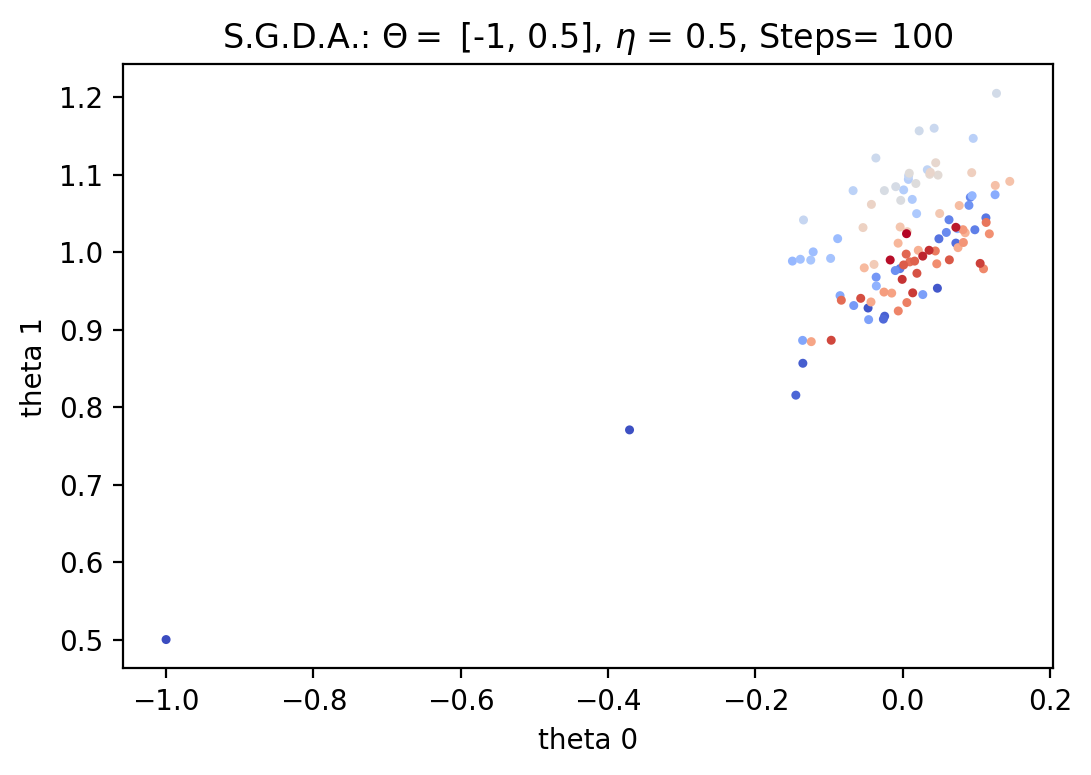

In [10]:
theta_est = [-1, 0.5]#variables as given in instructions
sigma_est = 0
eta = 0.5
numSteps =100

thetaArray=np.zeros((numSteps+1,len(theta_est)))#adapted from Week1_CurveFitting.ipynb
thetaArray[0]=theta_est#starting values added
for s in range(numSteps):
    x_sample = np.random.rand(10)#as instructed
    y_data = polyModelWithNoise(x_sample,theta,sigma)#as instructed
    y_model = polyModelWithNoise(x_sample,theta_est,sigma_est)#as instructed
    deviation= y_model-y_data#adapted from Week1_CurveFitting.ipynb
    theta_est-=eta*np.average(deviation[None,:]*
                              polyGradient(x_sample,theta_est),axis=1)#adapted from Week1_CurveFitting.ipynb
    thetaArray[s+1]=theta_est#adapted from Week1_CurveFitting.ipynb

#Scatterplot with initial values cold(blue) turning to hot(red) for final values
fig, ax = plt.subplots()
colors = np.arange(0,numSteps+1,1)#add colours to scatterblue at start moving to red at end.
ax.scatter(thetaArray[:,0],thetaArray[:,1], c= colors, cmap ='coolwarm', s=5)#blue at start moving to red at end.
ax.set_xlabel("theta 0")
ax.set_ylabel("theta 1")
ax.set_title(f'S.G.D.A.: $\Theta=$ [-1, 0.5], $\eta$ = {eta}, Steps= {numSteps}');

In [11]:
#to demonstrate that averaging last few values can improve accuracy of theta estimate.
print('Last 10 value pairs of thetaArray')
print(thetaArray[-10:])
order1_fit = np.array([np.average(thetaArray[-10:][:,0]), np.average(thetaArray[-10:][:,1])])
print('\nAverage of Last 10 value pairs')
print(order1_fit)

Last 10 value pairs of thetaArray
[[-5.68406873e-02  9.40269952e-01]
 [-9.68839212e-02  8.86177270e-01]
 [ 1.05345699e-01  9.85338662e-01]
 [ 1.37348345e-02  9.47346320e-01]
 [-5.35657436e-04  9.64744950e-01]
 [ 3.59907812e-02  1.00227084e+00]
 [ 2.73701533e-02  9.94714625e-01]
 [ 7.23589093e-02  1.03190817e+00]
 [-1.68086033e-02  9.89742991e-01]
 [ 5.36732245e-03  1.02367122e+00]]

Average of Last 10 value pairs
[0.00890988 0.9766185 ]


# Comment
It seems from the above graph and the last ten values of thetaArray, that the descent Algorithm gets close, but never completely converges on the true theta of [0,1]. By testing with different combinations of $\eta$, $\sigma$ and number of steps, it seems this is largely caused by $\sigma$. So for example, if $\sigma$ = 0, all other things equal, then it converges much better. It seems, therefore, that the noise function is "throwing" the descent algorithm off.
<p>The effect of sigma can be partially mitigated by: 
<p>    i) decreasing $\eta$ (chose factor of 100) so that the "wrong steps" taken by S.G.D.A are smaller and average out. 
<p>    ii) at the same increasing numSteps (chose factor of 100) to ensure convergence due to smaller steps. 
<p>    iii) to average over the last 100 value pairs of theta. This should work given the larger numSteps in ii).

Another way of increasing accuracy would be to increase the numbers of points in the sample data from 10. This was not tested as the instructions specified we should continue to work with 10 sample points.

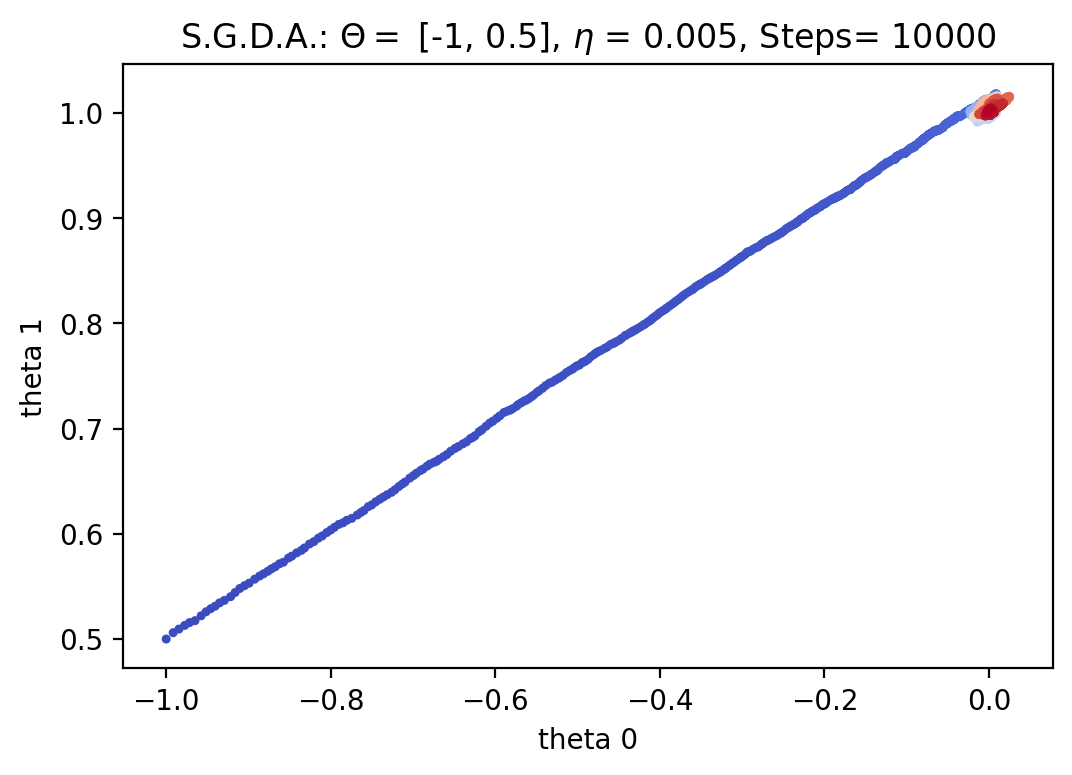

In [12]:
theta_est = [-1, 0.5]#variables as given in instructions
sigma_est = 0
eta = 0.005#new values
numSteps =10000#new values

thetaArray=np.zeros((numSteps+1,len(theta_est)))#adapted from Week1_CurveFitting.ipynb
thetaArray[0]=theta_est#starting values added
for s in range(numSteps):
    x_sample = np.random.rand(10)#as instructed
    y_data = polyModelWithNoise(x_sample,theta,sigma)#as instructed
    y_model = polyModelWithNoise(x_sample,theta_est,sigma_est)#as instructed
    deviation= y_model-y_data#adapted from Week1_CurveFitting.ipynb
    theta_est-=eta*np.average(deviation[None,:]*
                              polyGradient(x_sample,theta_est),axis=1)#adapted from Week1_CurveFitting.ipynb
    thetaArray[s+1]=theta_est#adapted from Week1_CurveFitting.ipynb

fig, ax = plt.subplots()
colors = np.arange(0,numSteps+1,1)#add colours to scatterblue at start moving to red at end.
ax.scatter(thetaArray[:,0],thetaArray[:,1], c= colors, cmap ='coolwarm', s=5)#blue at start moving to red at end.
ax.set_xlabel("theta 0")
ax.set_ylabel("theta 1")
ax.set_title(f'S.G.D.A.: $\Theta=$ [-1, 0.5], $\eta$ = {eta}, Steps= {numSteps}');

In [13]:
order1_fit = np.array([np.average(thetaArray[-100:][:,0]), np.average(thetaArray[-100:][:,1])])
print('\nAverage of Last 100 value pairs')
print(order1_fit)


Average of Last 100 value pairs
[-1.05432853e-04  1.00203822e+00]


# Comment
This set-up converges much closer onto the true values of theta.


# Task
Test using a third order polynomial with parameters 𝜃=[0,1,2,2] using the same noise as before.
<p>Fit this third order polynomial data using: 
<p>1st order polynomial
<p>3rd order polynomial
<p>7th order polynomial
<p>Use a stochastic gradient descent algorithm that samples 10 x and y data values between 0 and 1
<p>For all the fits, and as they were not specified in the instructions, it was decided for accuracy to continue with numSteps to 10000, $\eta$ to 0.005 and use the last 100 value pairs of thetaArray for the estimate of the coefficients. 

Coefficients of fit polynomial from x^0, x^1... [-0.68184092  4.67407282]


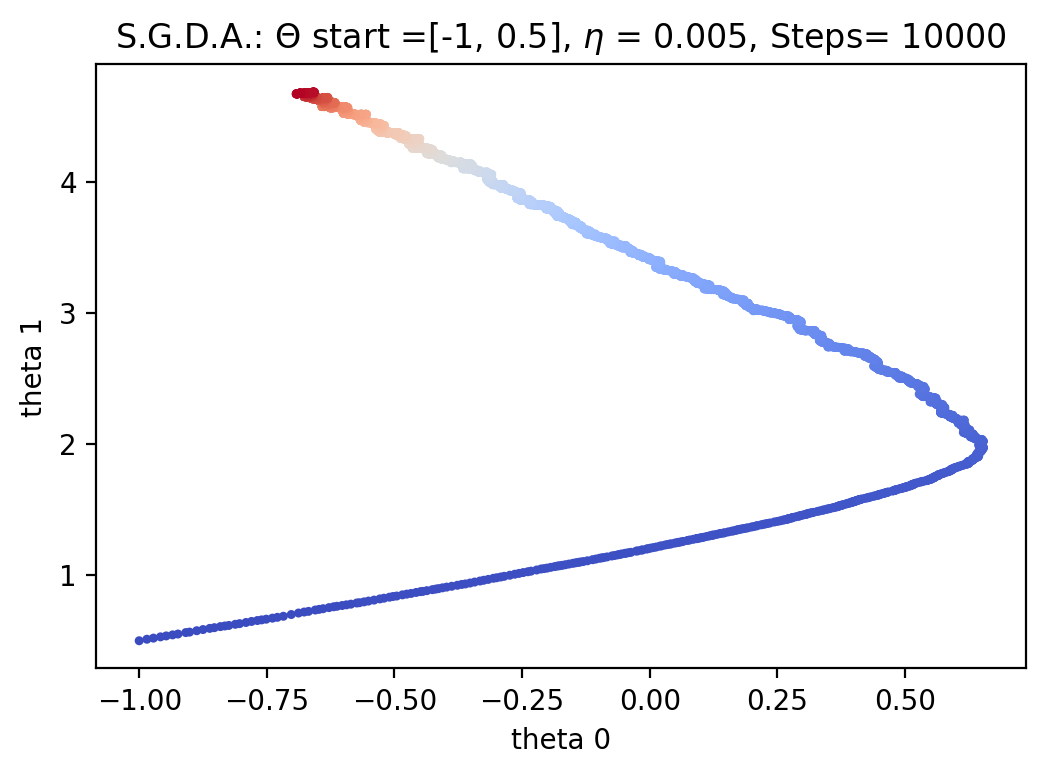

In [14]:
#Using a first order polynomial for fit
theta = [0,1,2,2]
sigma = 0.5
theta_est = [-1, 0.5]#same as previously used and different from first 2 components of theta
sigma_est = 0#i.e. no noise
eta = 0.005
numSteps =10000
thetaArray=np.zeros((numSteps+1,len(theta_est)))
thetaArray[0]=theta_est
for s in range(numSteps):
    x_sample = np.random.rand(10)
    y_data = polyModelWithNoise(x_sample,theta,sigma)
    y_model = polyModelWithNoise(x_sample,theta_est,sigma_est)
    deviation= y_model-y_data
    theta_est-=eta*np.average(deviation[None,:]*polyGradient(x_sample,theta_est),axis=1)
    thetaArray[s+1]=theta_est

fig, ax = plt.subplots()
colors = np.arange(0,numSteps+1,1)#add colours to scatterblue at start moving to red at end.
ax.scatter(thetaArray[:,0],thetaArray[:,1], c= colors, cmap ='coolwarm', s=5)#blue at start moving to red at end.
ax.set_xlabel("theta 0")
ax.set_ylabel("theta 1")
ax.set_title(f'S.G.D.A.: $\Theta$ start =[-1, 0.5], $\eta$ = {eta}, Steps= {numSteps}');

order1_fit = np.array([np.average(thetaArray[-100:][:,0]), 
                       np.average(thetaArray[-100:][:,1])]) 
print('Coefficients of fit polynomial from x^0, x^1...', order1_fit)

# Comments
For the 1st order fit, we see decent convergence with the effect of $\sigma$ well but not completely mitigated. 

In [15]:
#Using a third order polynomial for fit
theta = [0,1,2,2]
sigma = 0.5
theta_est = [-1, -1, -2, -2]#third order- chosen to be quite far from true values
sigma_est = 0
eta = 0.05#increased by *10 see discussion below
numSteps =10000
thetaArray=np.zeros((numSteps+1,len(theta_est)))
thetaArray[0]=theta_est
for s in range(numSteps):
    x_sample = np.random.rand(10)
    y_data = polyModelWithNoise(x_sample,theta,sigma)
    y_model = polyModelWithNoise(x_sample,theta_est,sigma_est)
    deviation= y_model-y_data
    theta_est-=eta*np.average(deviation[None,:]*polyGradient(x_sample,theta_est),axis=1)
    thetaArray[s+1]=theta_est
    
order3_fit = np.array([np.average(thetaArray[-100:][:,0]), 
                       np.average(thetaArray[-100:][:,1]), 
                       np.average(thetaArray[-100:][:,2]),
                       np.average(thetaArray[-100:][:,3])])
print('Coefficients of fit polynomial from x^0, x^1...', order3_fit)

Coefficients of fit polynomial from x^0, x^1... [-0.00857724  1.18040431  1.64482541  2.20727494]


# Comments
For 3rd order fit, theta did not seem to be converging with parameters set as previously, output was [-0.21244156  2.02883557  1.50042764  1.48833274] versus true values of [0,1,2,2]. Rather than increasing numSteps as this would increase run time, $\eta$ was increased by factor of ten to 0.05. This produced output of [-1.40090035e-03  1.17174239e+00  1.64759759e+00  2.22677364e+00]. This is much better but not perfect. It is not surprising that it is harder to fit four fit parameters than two.

For the 7th order polynomial, "we are flying blind": there is no easy graph we can plot as there are 8 dimensions and we can't compare like-for-like as we did for the 3rd order. Given concerns about fitting so many fit parameters, it was decided to increase  𝜂  by a further factor of 10 back to its original value of 0.5. Three runs were taken to check for consistency.

In [16]:
#Using a seventh order polynomial for fit
theta = [0,1,2,2]
sigma = 0.5
theta_est = [-1, 0.5, -1, 0.5, -1, 0.5, -1, 0.5]#seventh order starting coefficients chosen to be far from true
sigma_est = 0
eta = 0.5
numSteps =10000
thetaArray=np.zeros((numSteps+1,len(theta_est)))
thetaArray[0]=theta_est
for s in range(numSteps):
    x_sample = np.random.rand(10)
    y_data = polyModelWithNoise(x_sample,theta,sigma)
    y_model = polyModelWithNoise(x_sample,theta_est,sigma_est)
    deviation= y_model-y_data
    theta_est-=eta*np.average(deviation[None,:]*polyGradient(x_sample,theta_est),axis=1)
    thetaArray[s+1]=theta_est

order7_fit = np.array([np.average(thetaArray[-100:][:,0]), 
                       np.average(thetaArray[-100:][:,1]), 
                       np.average(thetaArray[-100:][:,2]),
                       np.average(thetaArray[-100:][:,3]),
                       np.average(thetaArray[-100:][:,4]),
                       np.average(thetaArray[-100:][:,5]),
                       np.average(thetaArray[-100:][:,6]),
                       np.average(thetaArray[-100:][:,7])])
print('Coefficients of fit polynomial from x^0, x^1...', order7_fit)

Coefficients of fit polynomial from x^0, x^1... [-0.04358426  1.37943219  1.06729674  2.26691599  0.13492781  1.03878021
 -0.94199941  0.18998943]


# Comments
Run 1
<p>[-0.01608408  1.23645073  1.20802742  2.38484873  0.1736193   1.00123951
 -1.03833002  0.05476898]

Run 2
<p>[-0.00832424  1.24480765  1.20633563  2.36925684  0.16052024  0.99331342
 -1.04498024  0.0444255 ]

Run 3
<p>
[-0.02588451  1.2884472   1.24579202  2.34482306  0.0989652   0.94596375
 -1.04101931  0.11896635]
 
The coefficients all have the right sign and are correct to +/- 0.1. Thus there was a decent level of consistency between the estimates of the coefficients.

# Task

Plot the third order polynomial data over an expanded x-range of -0.5,1.5 (with linearly spaced x values)
<p>Compare the data to your three best fit models (which were trained over the range x=0,1).
<p>Comment on how well the models generalise to the regions of x over which they were not trained.


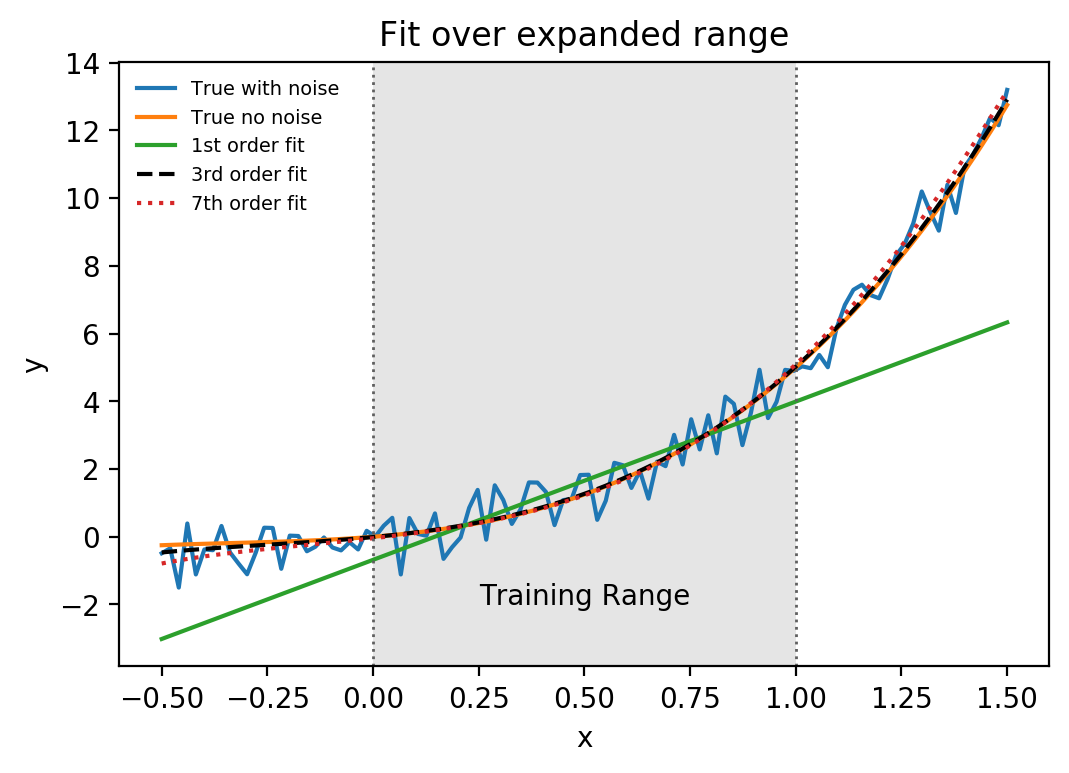

In [18]:
x_expanded = np.linspace(-0.5, 1.5, 100)#as instructed
fig, ax = plt.subplots()
ax.plot(x_expanded, polyModelWithNoise(x_expanded,theta,sigma), label='True with noise')
ax.plot(x_expanded, polyModelWithNoise(x_expanded,theta,0), label = 'True no noise')
ax.plot(x_expanded, polyModelWithNoise(x_expanded, order1_fit,0), label='1st order fit')
ax.plot(x_expanded, polyModelWithNoise(x_expanded, order3_fit,0), label='3rd order fit', c ='k', linestyle='dashed')
#selected dashed to show close fit in training range
ax.plot(x_expanded, polyModelWithNoise(x_expanded, order7_fit,0), label='7th order fit',linestyle='dotted')
#selected dotted to show close fit in training range
ax.legend(fontsize='x-small')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title('Fit over expanded range')
ax.axvline(x=0, c="#5f5f5f", ls="dotted", lw=1)#boundary of training range
ax.axvline(x=1, c="#5f5f5f", ls="dotted", lw=1)#boundary of training range
ax.axvspan(0,1,facecolor='k', alpha=0.1)#shade training range
plt.text(0.25, -2, "Training Range");#label it;

# Comments
The three models were trained over the range x = 0 to 1. The 3rd and 7th order models fit well in this range and even the 1st order model is not too far away, however, because it is linear it can't capture the change in gradient. Outside of that range, the linear model is a poor fit as the curvature of the true function takes it away from the straight line model. The 3rd order polynomial provides a close fit across the whole range and this is not surprising as the true function is 3rd order as well. It diverges to a small extent at the extremes. The 7th order is a good fit for most x values, but is progressively less so for the extreme values of x, i.e. further from the fit range. This could be an example of overfitting. The higher order terms may work well within the test range, but when extrapolated outside, may cause significant divergence from the true function. 